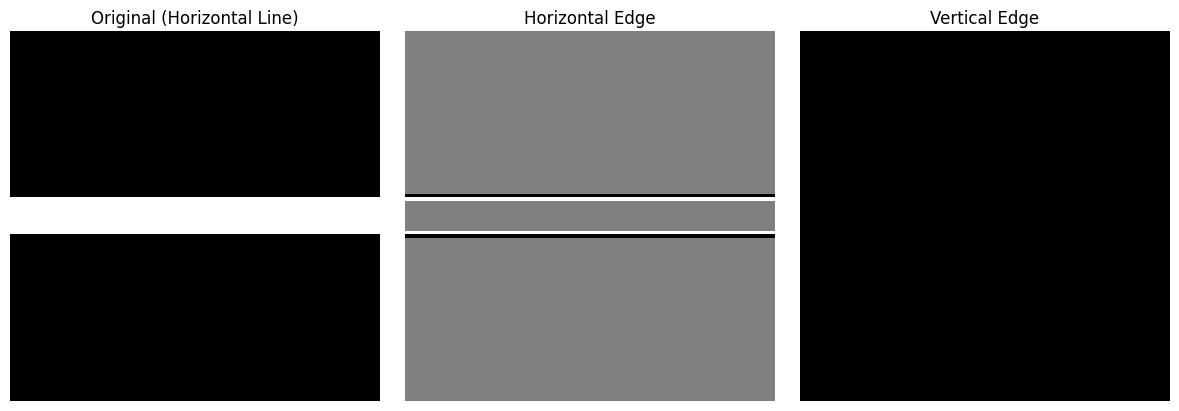

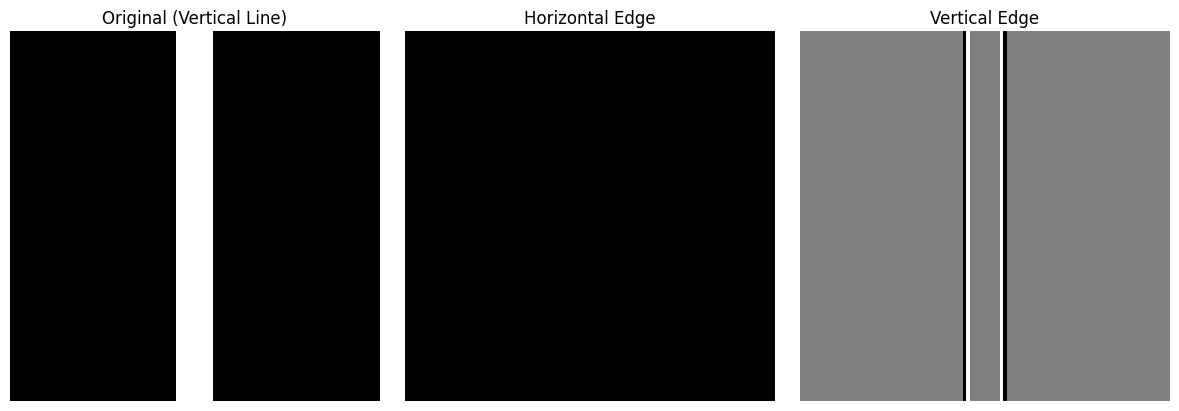

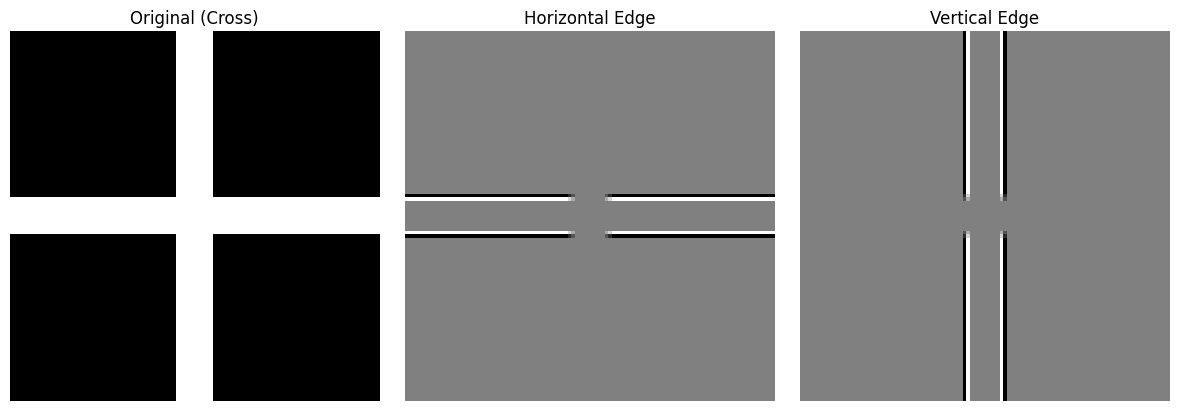

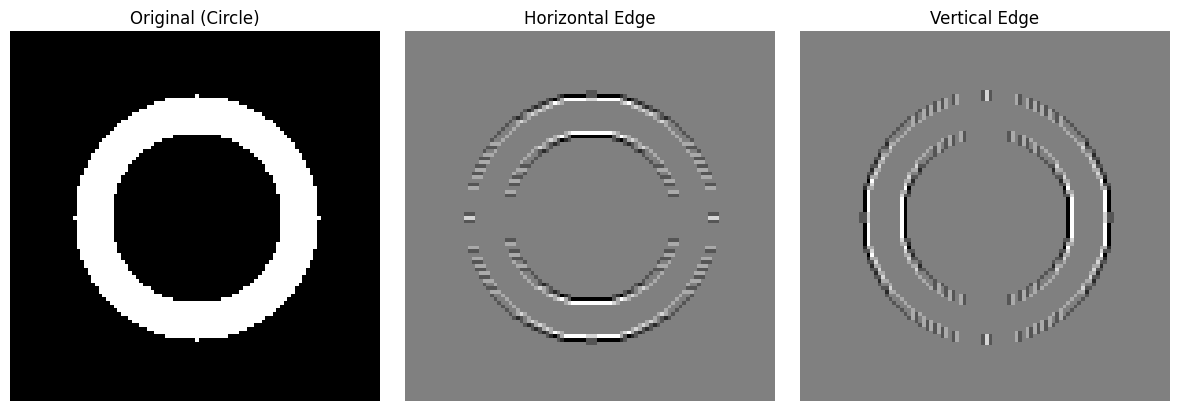

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from PIL import Image

# Create synthetic test images
def create_test_images(size=100, thickness=10):
    images = {}
    
    # 1. Horizontal Line
    horizontal = np.zeros((size, size))
    start = size//2 - thickness//2
    end = size//2 + thickness//2
    horizontal[start:end, :] = 255  # Thick horizontal line
    
    # 2. Vertical Line  
    vertical = np.zeros((size, size))
    start = size//2 - thickness//2
    end = size//2 + thickness//2
    vertical[:, start:end] = 255    # Thick vertical line
    
    # 3. Cross (Plus)
    cross = np.zeros((size, size))
    # Thick horizontal bar
    cross[start:end, :] = 255       
    # Thick vertical bar  
    cross[:, start:end] = 255       
    
    # 4. Circle
    circle = np.zeros((size, size))
    center = size // 2
    outer_radius = size // 3
    inner_radius = size // 3 - thickness    
    y, x = np.ogrid[:size, :size]
    distance = (x - center)**2 + (y - center)**2
    
    # Create thick circle (ring)
    circle[(distance <= outer_radius**2) & (distance >= inner_radius**2)] = 255
    
    images["Horizontal Line"] = horizontal
    images["Vertical Line"] = vertical  
    images["Cross"] = cross
    images["Circle"] = circle
    
    return images

# Generate the images
test_images = create_test_images(100, 10)
image_names = ["Horizontal Line", "Vertical Line", "Cross", "Circle"]
images = [test_images[name] for name in image_names]

# Define edge-detection kernels
kernels = {
    "Horizontal Edge": np.array([[-1, -1, -1], 
                                 [2, 2, 2], 
                                 [-1, -1, -1]]),
    "Vertical Edge": np.array([[-1, 2, -1], 
                               [-1, 2, -1], 
                               [-1, 2, -1]]),
}

# Apply kernels and visualize results
for image, name in zip(images, image_names):
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 3, 1)
    plt.imshow(image, cmap="gray")
    plt.title(f"Original ({name})")
    plt.axis("off")

    # Apply each kernel
    for i, (kernel_name, kernel) in enumerate(kernels.items(), start=2):
        convolved_image = convolve2d(image, kernel, mode="same", boundary="wrap")
        plt.subplot(2, 3, i)
        plt.imshow(convolved_image, cmap="gray")
        plt.title(kernel_name)
        plt.axis("off")
        plt.savefig("KernelExamples_Edges_" + str(i) + ".svg", format="svg")

    plt.tight_layout()
    
    plt.show()


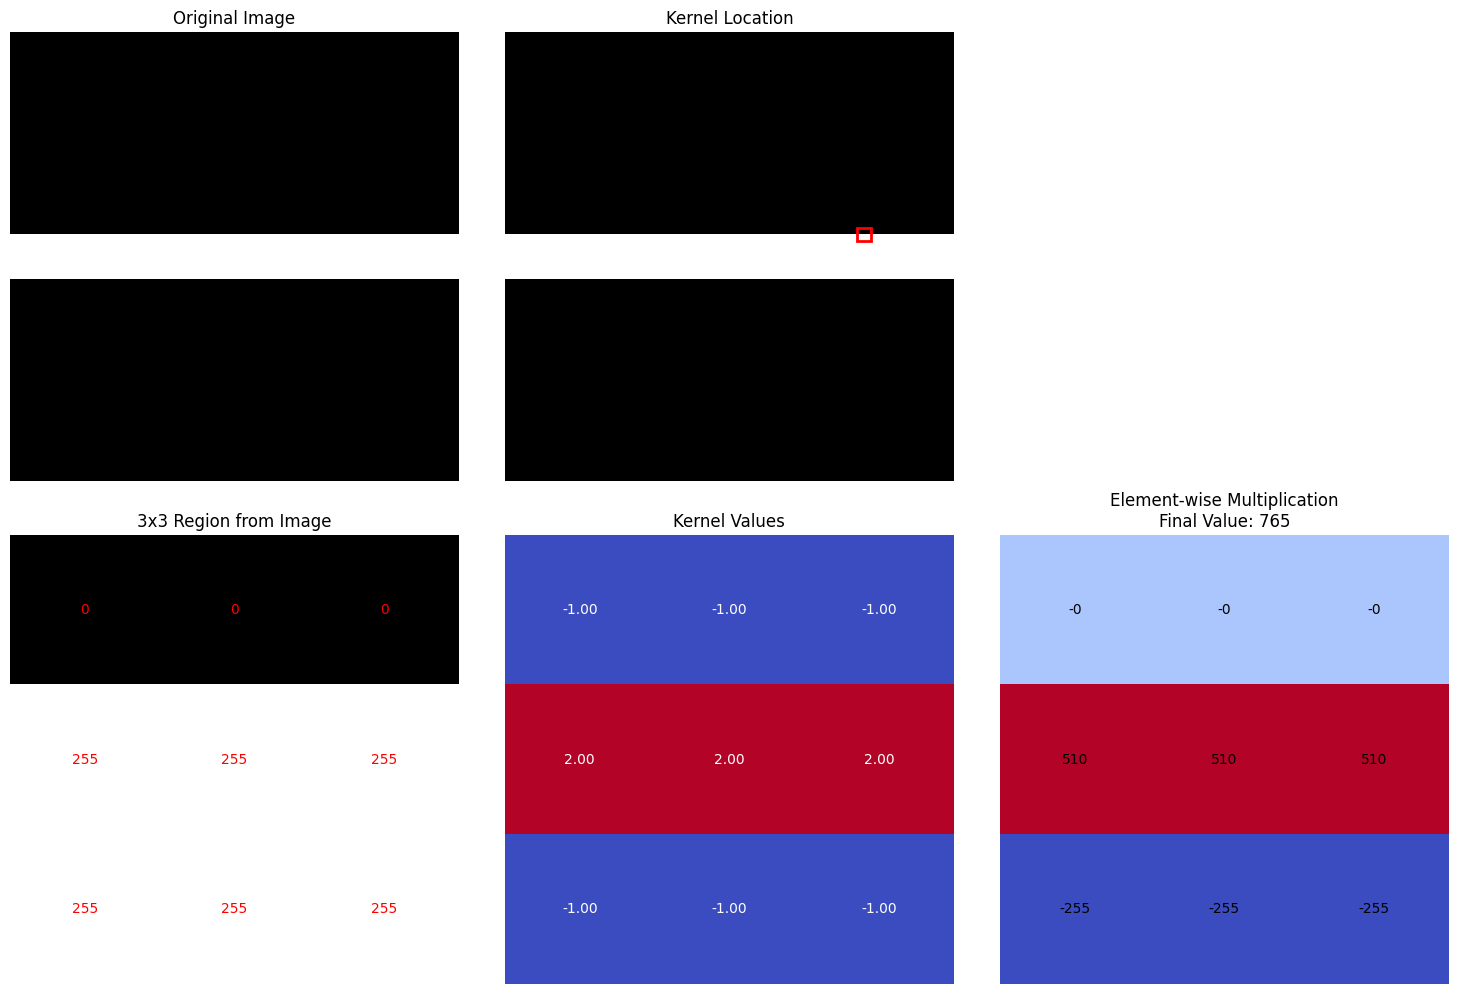

In [18]:
# Select an example image
image = images[0]  # We will use in our example the horizontal line image
image_name = image_names[0]

# Select region and kernel
i, j = 45, 80  # Center of kernel location
region = image[i - 1:i + 2, j - 1:j + 2]  # 3x3 region of the image
kernel = np.array([[-1, -1, -1], 
                    [2, 2, 2], 
                    [-1, -1, -1]])
result = region * kernel  # Element-wise multiplication
final_value = np.sum(result)  # Convolution result

# Plot the requested details
plt.figure(figsize=(15, 10))

# 1. Original Image
plt.subplot(2, 3, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

# 2. Kernel Location on Image
plt.subplot(2, 3, 2)
plt.imshow(image, cmap="gray")
plt.title("Kernel Location")
plt.axis("off")
plt.gca().add_patch(plt.Rectangle((j-2, i-2 ), 3, 3, edgecolor="red", fill=False, linewidth=2))

# 3. 3x3 Region from the Original Image
plt.subplot(2, 3, 4)
plt.imshow(region, cmap="gray", interpolation="nearest")
plt.title("3x3 Region from Image")
for x in range(3):
    for y in range(3):
        plt.text(y, x, f"{region[x, y]:.0f}", ha="center", va="center", color="red")
plt.axis("off")

# 4. Kernel Values
plt.subplot(2, 3, 5)
plt.imshow(kernel, cmap="coolwarm", interpolation="nearest")
plt.title("Kernel Values")
for x in range(3):
    for y in range(3):
        plt.text(y, x, f"{kernel[x, y]:.2f}", ha="center", va="center", color="white")
plt.axis("off")

# 5. Calculation Result (Element-wise Multiplication)
plt.subplot(2, 3, 6)
plt.imshow(result, cmap="coolwarm", interpolation="nearest")
plt.title(f"Element-wise Multiplication\nFinal Value: {final_value:.0f}")
for x in range(3):
    for y in range(3):
        plt.text(y, x, f"{result[x, y]:.0f}", ha="center", va="center", color="black")
plt.axis("off")

plt.tight_layout()
plt.show()
